In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Cars Dataset'):
        print(os.path.join(dirname))

/content/drive/MyDrive/Cars Dataset
/content/drive/MyDrive/Cars Dataset/train
/content/drive/MyDrive/Cars Dataset/train/Hyundai Creta
/content/drive/MyDrive/Cars Dataset/train/Mahindra Scorpio
/content/drive/MyDrive/Cars Dataset/train/Audi
/content/drive/MyDrive/Cars Dataset/train/Rolls Royce
/content/drive/MyDrive/Cars Dataset/train/Toyota Innova
/content/drive/MyDrive/Cars Dataset/train/Swift
/content/drive/MyDrive/Cars Dataset/train/Tata Safari
/content/drive/MyDrive/Cars Dataset/test
/content/drive/MyDrive/Cars Dataset/test/Rolls Royce
/content/drive/MyDrive/Cars Dataset/test/Hyundai Creta
/content/drive/MyDrive/Cars Dataset/test/Swift
/content/drive/MyDrive/Cars Dataset/test/Toyota Innova
/content/drive/MyDrive/Cars Dataset/test/Mahindra Scorpio
/content/drive/MyDrive/Cars Dataset/test/Tata Safari
/content/drive/MyDrive/Cars Dataset/test/Audi


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [34]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break


[[[0.44832808 0.48371983 0.41607684]
  [0.4622689  0.48995802 0.45751396]
  [0.36443672 0.3918877  0.36051515]
  ...
  [0.19959636 0.1914969  0.21619894]
  [0.20328042 0.19354358 0.21947366]
  [0.20696445 0.19559029 0.22274837]]

 [[0.4536495  0.48945057 0.41771418]
  [0.46063155 0.48913932 0.4530112 ]
  [0.37507954 0.40253052 0.37115797]
  ...
  [0.16606945 0.12446638 0.18175572]
  [0.16033868 0.11464224 0.17602497]
  [0.15460795 0.10481811 0.17029423]]

 [[0.45897087 0.49518132 0.41935155]
  [0.45899418 0.48832065 0.4485085 ]
  [0.38572237 0.41317335 0.3818008 ]
  ...
  [0.12924187 0.06641182 0.13900332]
  [0.12596716 0.06149976 0.13490993]
  [0.12269245 0.05658768 0.13081653]]

 ...

 [[0.8588236  0.8745099  0.87843144]
  [0.8588236  0.8745099  0.87843144]
  [0.8588236  0.8745099  0.87843144]
  ...
  [0.28235295 0.28627452 0.29411766]
  [0.28235295 0.28627452 0.29411766]
  [0.28326926 0.28627452 0.29411766]]

 [[0.8588236  0.8745099  0.87843144]
  [0.8588236  0.8745099  0.87843144]


In [35]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [36]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 3352 images belonging to 7 classes.


In [37]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5441202  0.50553775 0.39838892]
  [0.7860965  0.7501624  0.6377169 ]
  [0.868689   0.8333949  0.70657015]
  ...
  [0.41640702 0.36998835 0.11791416]
  [0.4129527  0.3672249  0.11538099]
  [0.40949836 0.36446142 0.11284781]]

 [[0.55517405 0.51682186 0.4092125 ]
  [0.7669826  0.7308182  0.61883324]
  [0.8666164  0.8313223  0.7054187 ]
  ...
  [0.46206206 0.41610378 0.17640741]
  [0.4671284  0.42093986 0.18216461]
  [0.47219473 0.42577592 0.18792182]]

 [[0.5662279  0.528106   0.42003605]
  [0.74786866 0.711474   0.5999496 ]
  [0.86454386 0.82924974 0.7042673 ]
  ...
  [0.48064607 0.43358725 0.20392159]
  [0.4801855  0.4331267  0.20392159]
  [0.4797249  0.4326661  0.20392159]]

 ...

 [[0.5953907  0.57186127 0.52480245]
  [0.5965422  0.57301277 0.5259539 ]
  [0.59769356 0.57416415 0.52710533]
  ...
  [0.48627454 0.4666667  0.3921569 ]
  [0.48517397 0.46556613 0.3910563 ]
  [0.48235297 0.46274513 0.38823533]]

 [[0.6085648  0.5850353  0.5379765 ]
  [0.60741335 0.58388394 0.5368251 ]


In [38]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_3 (Dense)             (None, 96)               

In [40]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [41]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=35
)

Epoch 1/35
105/105 [==============================] - 117s 1s/step - loss: 1.8676 - accuracy: 0.2533 - val_loss: 1.7351 - val_accuracy: 0.3538
Epoch 2/35
105/105 [==============================] - 116s 1s/step - loss: 1.7107 - accuracy: 0.3658 - val_loss: 1.5186 - val_accuracy: 0.4526
Epoch 3/35
105/105 [==============================] - 115s 1s/step - loss: 1.5311 - accuracy: 0.4463 - val_loss: 1.3745 - val_accuracy: 0.5185
Epoch 4/35
105/105 [==============================] - 116s 1s/step - loss: 1.3840 - accuracy: 0.5003 - val_loss: 1.1705 - val_accuracy: 0.5817
Epoch 5/35
105/105 [==============================] - 156s 1s/step - loss: 1.2982 - accuracy: 0.5474 - val_loss: 1.1004 - val_accuracy: 0.6214
Epoch 6/35
105/105 [==============================] - 115s 1s/step - loss: 1.1755 - accuracy: 0.5767 - val_loss: 0.9395 - val_accuracy: 0.6787
Epoch 7/35
105/105 [==============================] - 116s 1s/step - loss: 1.0999 - accuracy: 0.6110 - val_loss: 0.8929 - val_accuracy: 0.7172

In [42]:
scores = model.evaluate(test_generator)

105/105 [==============================] - 40s 384ms/step - loss: 0.1629 - accuracy: 0.9520


In [ ]:
scores

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
type(history.history['loss'])

list

In [45]:
len(history.history['loss'])

35

In [46]:
history.history['loss'][:1] # show loss for first 5 epochs

[1.8676438331604004]

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [48]:
# import matplotlib.pyplot as plt
# EPOCHS = 20

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(range(EPOCHS), acc, label='Training Accuracy')
# plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(range(EPOCHS), loss, label='Training Loss')
# plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 35ms/step


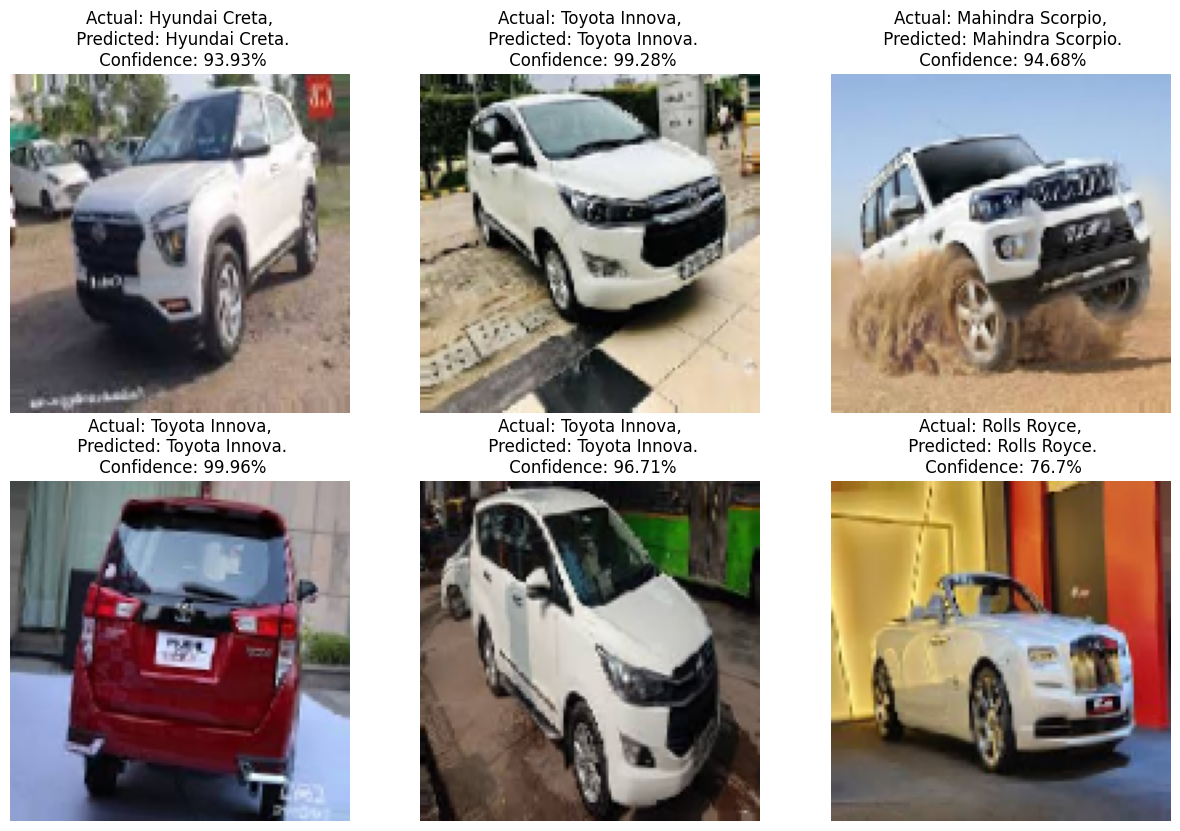

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break